In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class K_Means:
    
    def __init__(self, n_clusters=8, tol=0.001, max_iter=300):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, X):
        
        n = X.shape[0] 
        m = X.shape[1]
        
        mean = np.mean(X, axis = 0)
        std = np.std(X, axis = 0)
        self.cluster_centers_ = np.random.randn(self.n_clusters, m) * std + mean
        
        self.labels_ = np.zeros(n)
        distances = np.zeros((n, self.n_clusters))
        
        
        self.n_iter_ = 0
        for i in range(self.max_iter):
            self.n_iter_ = i
            
            for j in range(self.n_clusters):
                distances[:,j] = np.sum(((X - self.cluster_centers_[j])**2), axis=1)**(1/2)
                           
            self.labels_ = np.argmin(distances, axis=1)
            
            #to avoid empty clusters
            for j in range(self.n_clusters):
                if j not in self.labels_: #check if all clusters have at least one example X, if not randomly assign 
                    self.labels_[random.randint(0, n-1)] = j
            
                
            prev_cluster_centers = np.copy(self.cluster_centers_)
            
            for j in range(self.n_clusters):
                self.cluster_centers_[j] = np.mean(X[self.labels_ == j], axis=0)
                
            err = 0
            for j in range(self.n_clusters):
                err = err + np.sum(((prev_cluster_centers[j] - self.cluster_centers_[j])**2), axis=0)**(1/2)
                
            if err < self.tol:
                break
        
                
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for j in range(self.n_clusters):
            distances[:,j] = np.sum(((X - self.cluster_centers_[j])**2), axis=1)**(1/2)
        classification = np.argmin(distances, axis=1)
        return classification

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [4]:
df = load_iris()

In [5]:
type(df)

sklearn.utils.Bunch

In [6]:
len(df.data)

150

In [7]:
print(df.data[0:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [8]:
print(df.target[0:3])

[0 0 0]


In [9]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
X = df['data']
y = df['target']

In [12]:
X.shape

(150, 4)

In [13]:
y.shape

(150,)

Text(0, 0.5, 'Sepal Width')

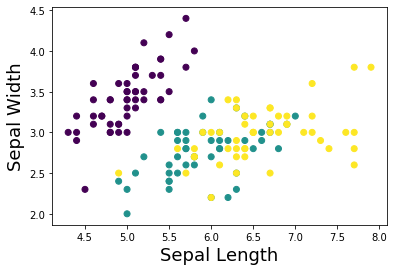

In [14]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Text(0, 0.5, 'Petal Width')

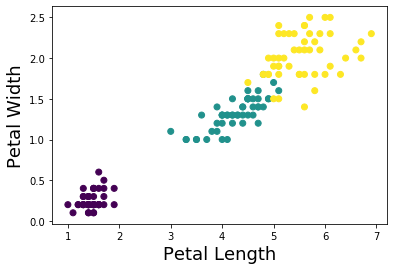

In [15]:
plt.scatter(X[:,2], X[:,3], c=y)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

In [16]:
km = KMeans(n_clusters = 3, init = 'random', n_jobs = -1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=-1, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [17]:
centers = km.cluster_centers_
print(centers)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [18]:
new_labels = km.labels_
print(new_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


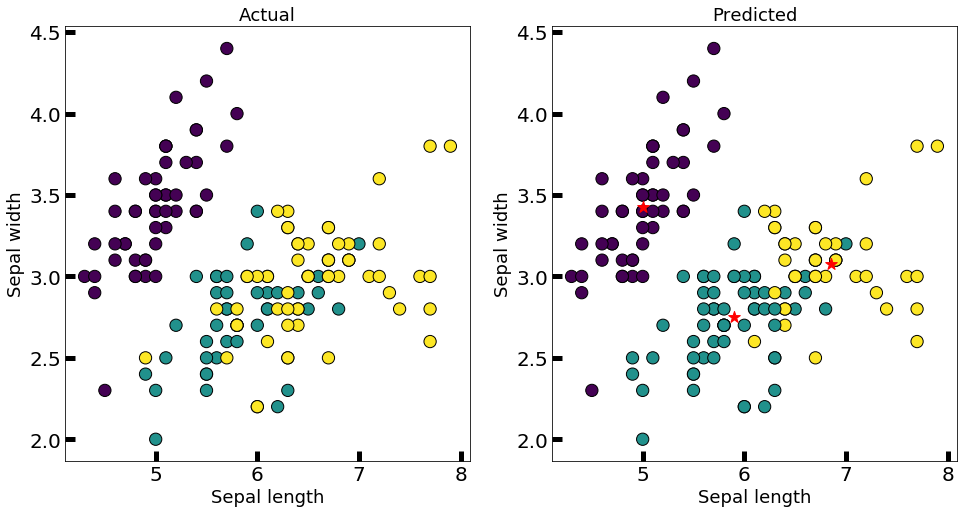

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y,
edgecolor='k', s=150)

axes[1].scatter(X[:, 0], X[:, 1], c=new_labels,
edgecolor='k', s=150)
axes[1].scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)

axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.show()

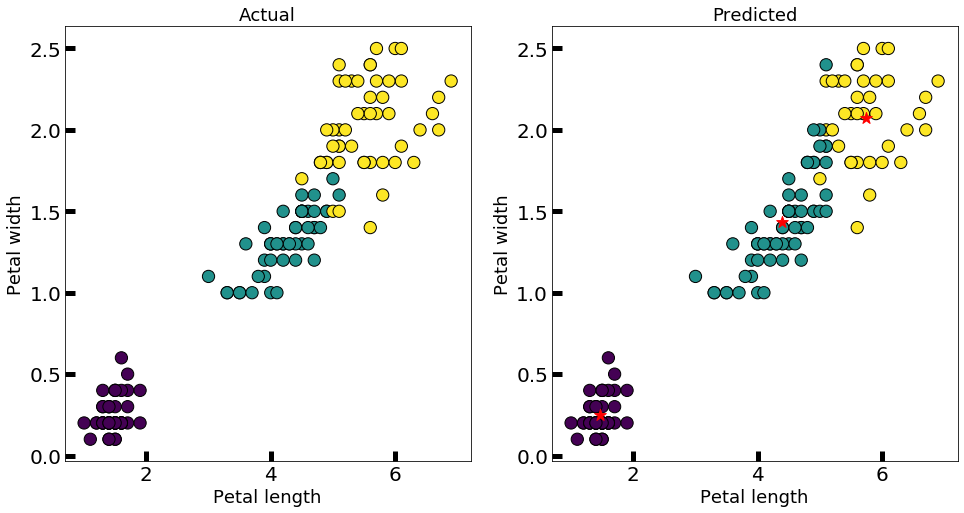

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y,
edgecolor='k', s=150)

axes[1].scatter(X[:, 2], X[:, 3], c=new_labels,
edgecolor='k', s=150)
axes[1].scatter(centers[:,2], centers[:,3], marker='*', c='r', s=150)

axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)

axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.show()

In [21]:
km.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [22]:
from sklearn.metrics.cluster import adjusted_rand_score

In [23]:
ARI = adjusted_rand_score(y, km.predict(X))

In [24]:
print('Sklearn k-means')
print('Adjusted Rand Index  : ', ARI)

Sklearn k-means
Adjusted Rand Index  :  0.7302382722834697


In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [26]:
range_n_clusters = [2, 3, 4, 5, 6]

In [27]:
def plot_silhouette(n_clusters, clusterer):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on the iris dataset "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972866
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3648340039670016


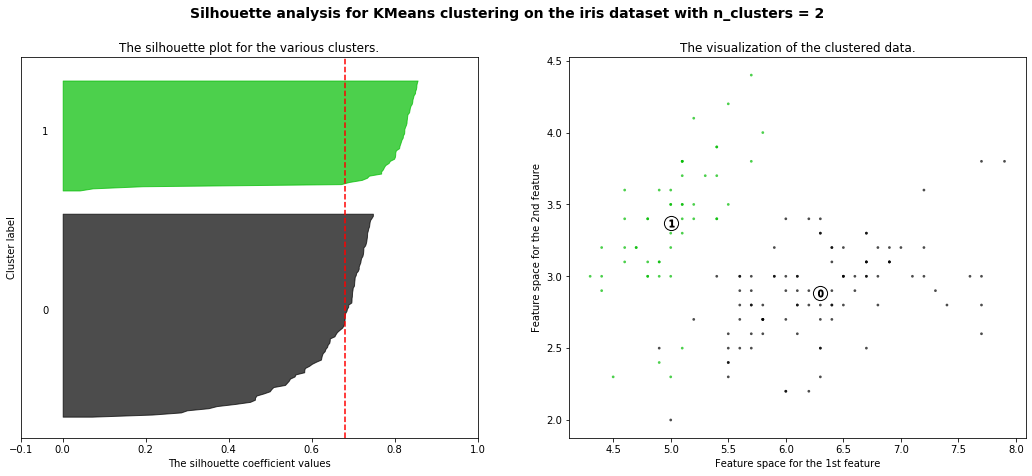

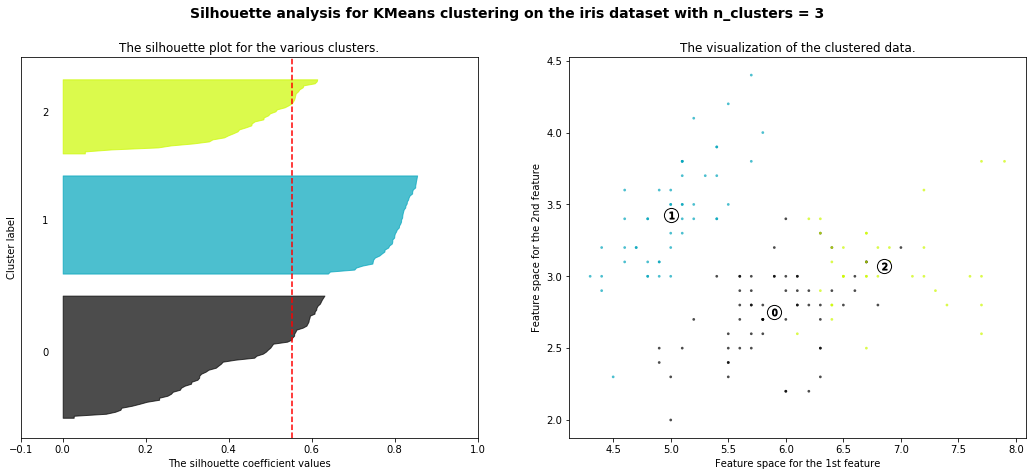

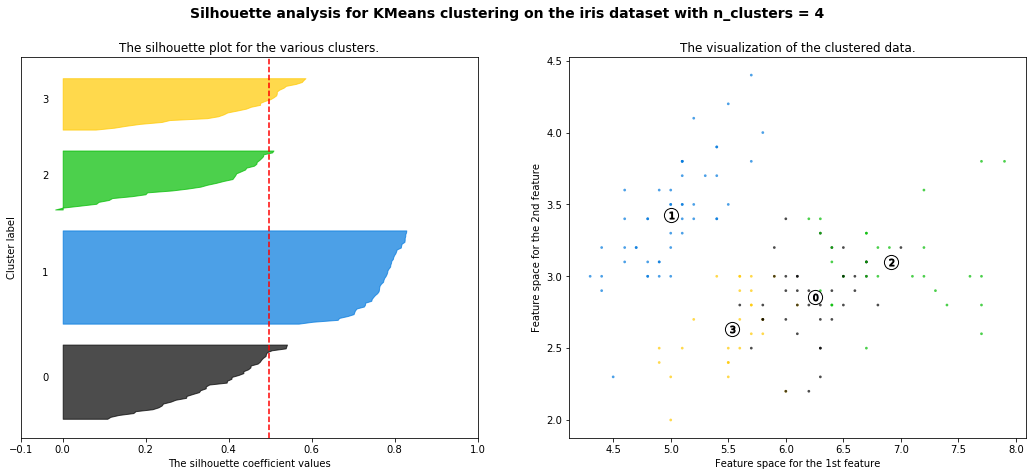

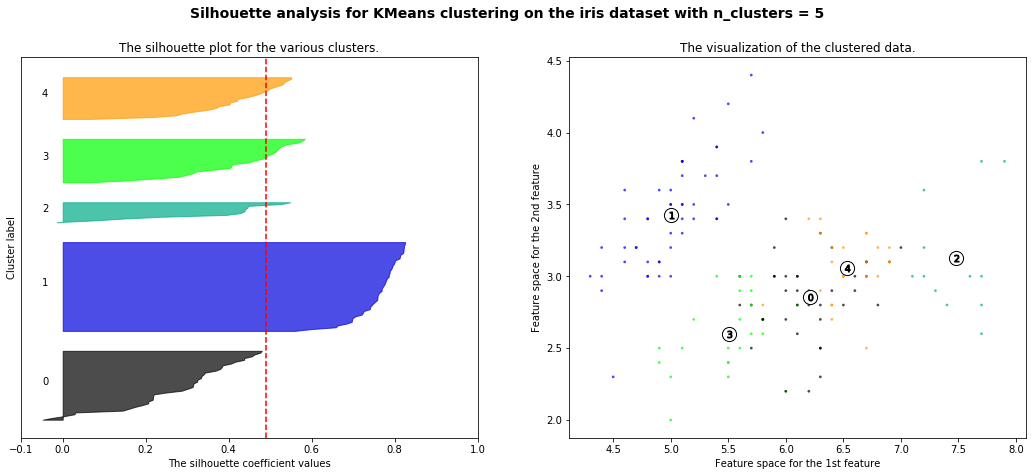

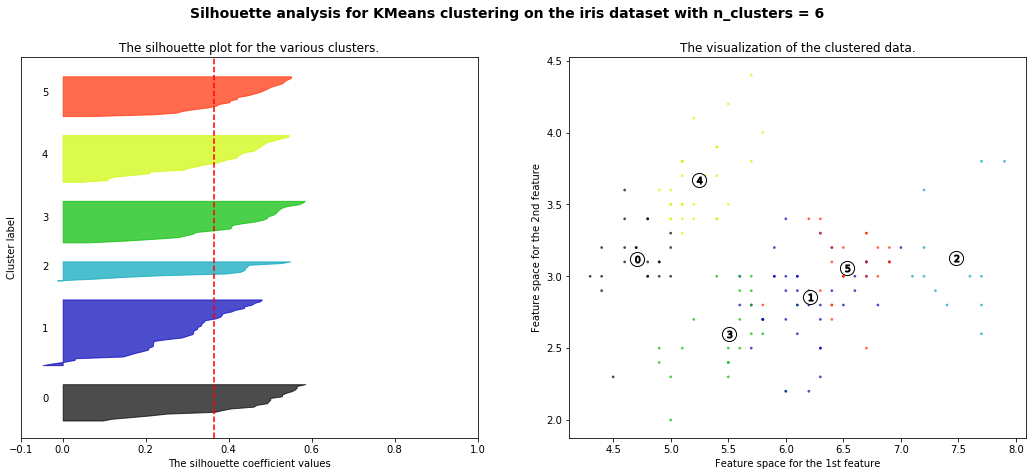

In [28]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    plot_silhouette(n_clusters, clusterer)

In [29]:
from sklearn.decomposition import PCA

In [30]:

def plot_PCA_reduced_data(n_clusters, kmeans):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    
    reduced_data = PCA(n_components=2).fit_transform(X)
    #kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=10)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    ax.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    
    
    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("KMeans clustering on the iris dataset (PCA-reduced data) "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
plt.show()

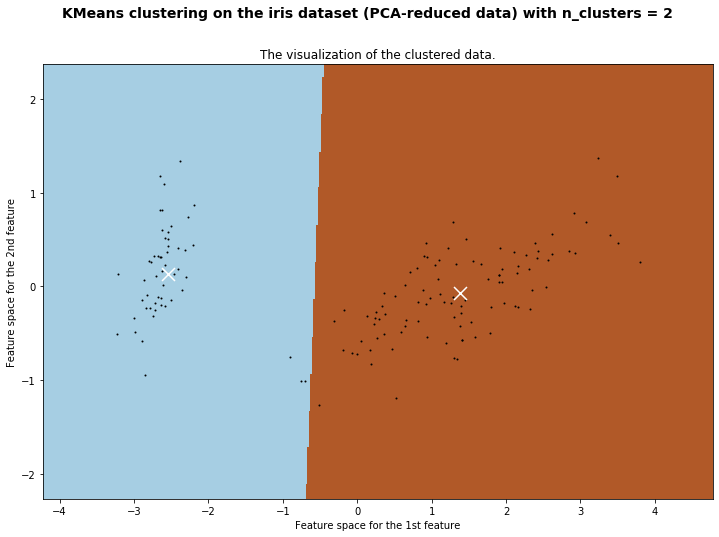

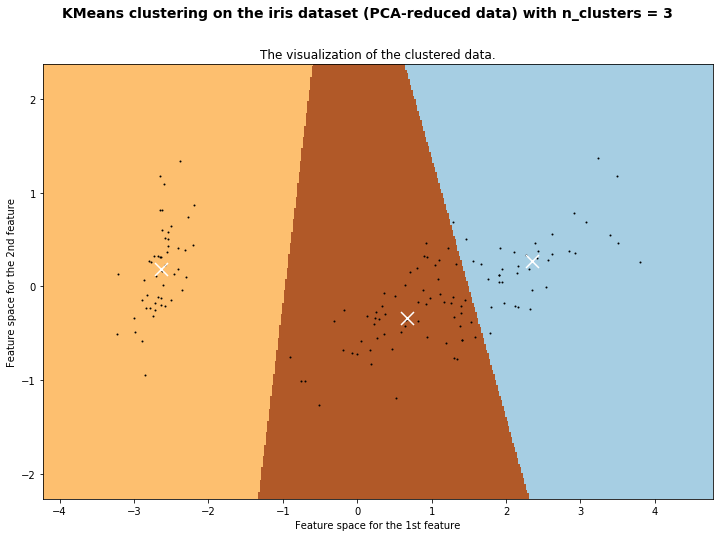

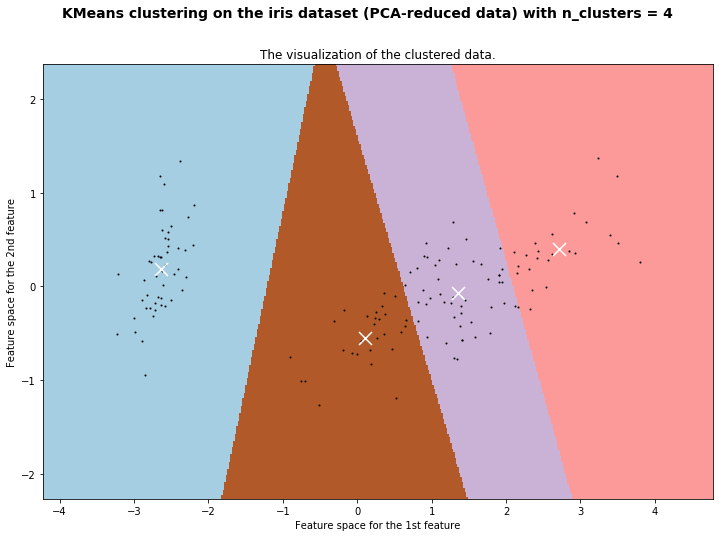

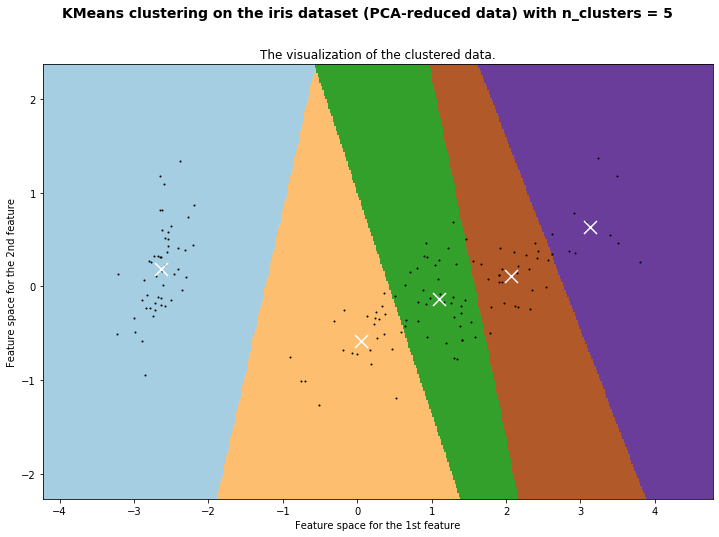

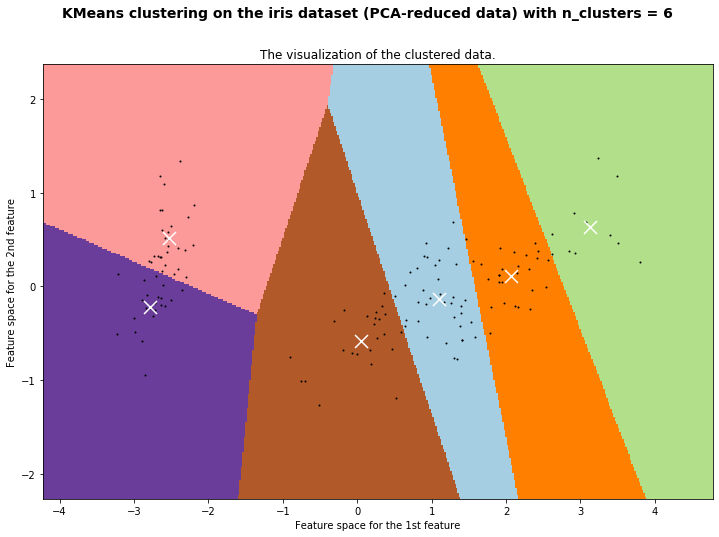

In [31]:
for n_clusters in range_n_clusters:
    kmeans = KMeans(init='random', n_clusters=n_clusters)
    plot_PCA_reduced_data(n_clusters, kmeans)

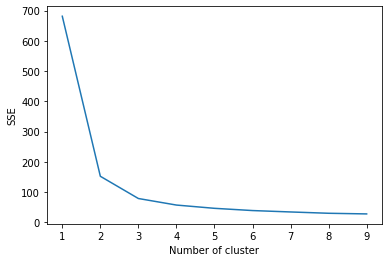

In [32]:
sse = {}

for k in range(1, 10):

    kmeans = KMeans(n_clusters=k).fit(X)

    df["clusters"] = kmeans.labels_

    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()

plt.plot(list(sse.keys()), list(sse.values()))

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()